In [1]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37203       33  NASHVILLE  93532.890729543782  120334624.37817383   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   
4  37246       57  NASHVILLE  2247.4521491892065  315078.17651367187   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...  
4  MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ...

In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             57 non-null     object  
 1   objectid        57 non-null     object  
 2   po_name         57 non-null     object  
 3   shape_stlength  57 non-null     object  
 4   shape_starea    57 non-null     object  
 5   geometry        57 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


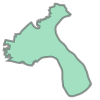

In [5]:
zipcodes.loc[0,'geometry']

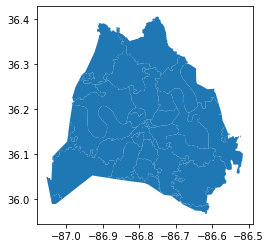

In [6]:
zipcodes.plot();

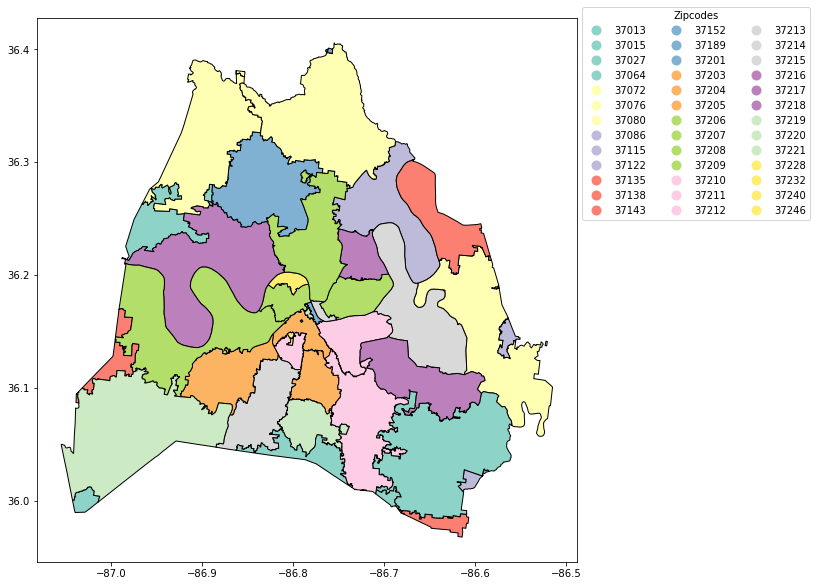

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [8]:
may_trips_pkl = pd.read_pickle('../data/may_trips.pkl')
print(may_trips_pkl.shape)
may_trips_pkl.head()

(224969, 10)


pubTimeStamp tripRecordNum  \
0 2019-05-01 00:00:55.423       BRD2134   
1 2019-05-01 00:03:33.147          LFT5   
2 2019-05-01 00:05:55.570       BRD2168   
3 2019-05-01 00:05:55.570       BRD2166   
4 2019-05-01 00:05:55.570       BRD2165   

                                           tripRoute         sumdID  \
0  [[36.157235,-86.803612],[36.157235,-86.80362],...   Powered9EAJL   
1  [[36.15797,-86.77896],[36.15795,-86.77873],[36...  Powered296631   
2     [[36.155068,-86.782124],[36.156597,-86.78675]]   Powered7S2UU   
3  [[36.149741,-86.779344],[36.149741,-86.779327]...   PoweredZIIVX   
4  [[36.177699,-86.786477],[36.177711,-86.786469]...   PoweredJ7MB3   

   tripDuration  tripDistance  startLatitude  endLatitude  startLongitude  \
0        3.0000     958.00528       36.15710     36.15660       -86.80360   
1        1.7156    1371.39112       36.15797     36.16054       -86.77896   
2        3.0000    2296.58800       36.15470     36.15650       -86.78180   
3        3.0000    1200.78744       36.14940     36.15310       -86.77950   
4        2.0000     351.04988       36.17780     36.17740       -86.78660   

   endLongitude  
0     -86.80670  
1     -86.77689  
2     -86.78680  
3     -86.77960  
4     -86.78760

In [9]:
may_trips_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    224969 non-null  datetime64[ns]
 1   tripRecordNum   224969 non-null  object        
 2   tripRoute       224969 non-null  object        
 3   sumdID          224969 non-null  object        
 4   tripDuration    224969 non-null  float64       
 5   tripDistance    224969 non-null  float64       
 6   startLatitude   224969 non-null  float64       
 7   endLatitude     224969 non-null  float64       
 8   startLongitude  224969 non-null  float64       
 9   endLongitude    224969 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 17.2+ MB


In [10]:
may_trips_pkl.loc[0].startLatitude

36.1571

In [11]:
may_trips_pkl['geometry'] = may_trips_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
may_trips_pkl.head(3)

pubTimeStamp tripRecordNum  \
0 2019-05-01 00:00:55.423       BRD2134   
1 2019-05-01 00:03:33.147          LFT5   
2 2019-05-01 00:05:55.570       BRD2168   

                                           tripRoute         sumdID  \
0  [[36.157235,-86.803612],[36.157235,-86.80362],...   Powered9EAJL   
1  [[36.15797,-86.77896],[36.15795,-86.77873],[36...  Powered296631   
2     [[36.155068,-86.782124],[36.156597,-86.78675]]   Powered7S2UU   

   tripDuration  tripDistance  startLatitude  endLatitude  startLongitude  \
0        3.0000     958.00528       36.15710     36.15660       -86.80360   
1        1.7156    1371.39112       36.15797     36.16054       -86.77896   
2        3.0000    2296.58800       36.15470     36.15650       -86.78180   

   endLongitude                    geometry  
0     -86.80670    POINT (-86.8036 36.1571)  
1     -86.77689  POINT (-86.77896 36.15797)  
2     -86.78680    POINT (-86.7818 36.1547)

In [12]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
may_scooter_geo = gpd.GeoDataFrame(may_trips_pkl, 
                           crs = zipcodes.crs, 
                           geometry = may_trips_pkl['geometry'])

In [15]:
type(may_trips_pkl)

pandas.core.frame.DataFrame

In [16]:
type(may_scooter_geo)

geopandas.geodataframe.GeoDataFrame

In [17]:
may_scooter_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    224969 non-null  datetime64[ns]
 1   tripRecordNum   224969 non-null  object        
 2   tripRoute       224969 non-null  object        
 3   sumdID          224969 non-null  object        
 4   tripDuration    224969 non-null  float64       
 5   tripDistance    224969 non-null  float64       
 6   startLatitude   224969 non-null  float64       
 7   endLatitude     224969 non-null  float64       
 8   startLongitude  224969 non-null  float64       
 9   endLongitude    224969 non-null  float64       
 10  geometry        224969 non-null  geometry      
dtypes: datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 18.9+ MB


In [18]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [19]:
stops_by_zip = gpd.sjoin(may_scooter_geo, zipcodes, op = 'within')

In [20]:
stops_by_zip.head()

pubTimeStamp tripRecordNum  \
0 2019-05-01 00:00:55.423       BRD2134   
1 2019-05-01 00:03:33.147          LFT5   
2 2019-05-01 00:05:55.570       BRD2168   
3 2019-05-01 00:05:55.570       BRD2166   
5 2019-05-01 00:05:55.570       BRD2167   

                                           tripRoute         sumdID  \
0  [[36.157235,-86.803612],[36.157235,-86.80362],...   Powered9EAJL   
1  [[36.15797,-86.77896],[36.15795,-86.77873],[36...  Powered296631   
2     [[36.155068,-86.782124],[36.156597,-86.78675]]   Powered7S2UU   
3  [[36.149741,-86.779344],[36.149741,-86.779327]...   PoweredZIIVX   
5  [[36.154368,-86.785909],[36.151689,-86.784331]...   PoweredEJF1K   

   tripDuration  tripDistance  startLatitude  endLatitude  startLongitude  \
0        3.0000     958.00528       36.15710     36.15660       -86.80360   
1        1.7156    1371.39112       36.15797     36.16054       -86.77896   
2        3.0000    2296.58800       36.15470     36.15650       -86.78180   
3        3.0000    1200.78744       36.14940     36.15310       -86.77950   
5        3.0000     984.25200       36.15440     36.15150       -86.78620   

   endLongitude                    geometry  index_right    zip    po_name  
0     -86.80670  POINT (-86.80360 36.15710)            1  37203  NASHVILLE  
1     -86.77689  POINT (-86.77896 36.15797)            1  37203  NASHVILLE  
2     -86.78680  POINT (-86.78180 36.15470)            1  37203  NASHVILLE  
3     -86.77960  POINT (-86.77950 36.14940)            1  37203  NASHVILLE  
5     -86.78440  POINT (-86.78620 36.15440)            1  37203  NASHVILLE

In [21]:
stops_by_zip['zip'].value_counts()

37203    97397
37201    39847
37219    17858
37212    17020
37204    15713
37206     8866
37208     8725
37213     8710
37210     4870
37240     1605
37232     1379
37207     1086
37209      702
37215      330
37228      243
37216      206
37205      185
37246       99
37211       42
37217       41
37214       15
37013       15
37218        5
37221        5
37115        3
37138        1
37220        1
Name: zip, dtype: int64

In [22]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
stops_in_37207.shape

(1086, 14)

In [23]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

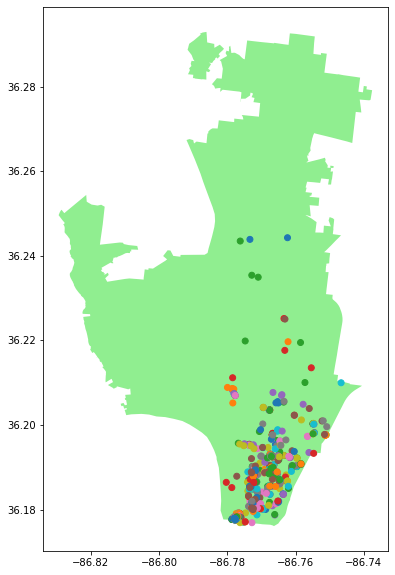

In [97]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37207.plot( ax = ax, column = 'sumdID');
plt.show();

In [25]:
polygon37207.geometry.centroid

C:\Users\Joselit\AppData\Local\Temp/ipykernel_9096/3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


49    POINT (-86.77677 36.23245)
54    POINT (-86.78726 36.28724)
dtype: geometry

In [26]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[49]
print(center)

POINT (-86.77676762469856 36.23245257407242)


C:\Users\Joselit\AppData\Local\Temp/ipykernel_9096/760013409.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[49]


In [27]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407242, -86.77676762469856]


In [69]:
stops_in_37206 = stops_by_zip.loc[stops_by_zip['zip'] == '37206']
stops_in_37206 = stops_in_37206[:800]
stops_in_37206.shape

(800, 14)

In [70]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

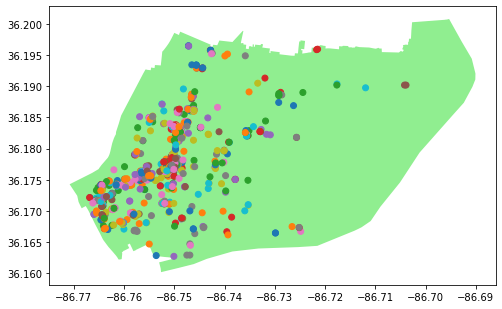

In [98]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37206.plot( ax = ax, column = 'sumdID');
plt.show();

In [72]:
stops_in_37213 = stops_by_zip.loc[stops_by_zip['zip'] == '37213']
stops_in_37213 = stops_in_37213[:800]
stops_in_37213.shape

(800, 14)

In [73]:
polygon37213 = zipcodes.loc[zipcodes['zip'] == '37213']
polygon37213.shape

(1, 3)

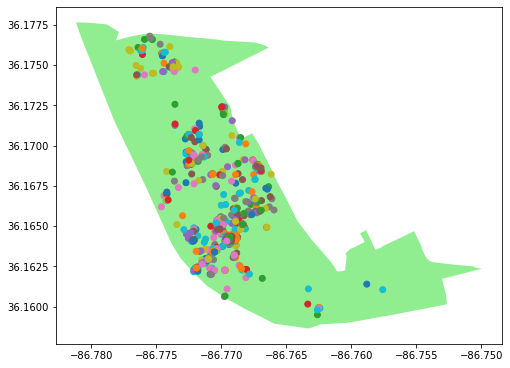

In [99]:
#fig, ax = matplotlib.subplots()
ax = polygon37213.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37213.plot( ax = ax, column = 'sumdID');
plt.show();

In [75]:
stops_in_37219 = stops_by_zip.loc[stops_by_zip['zip'] == '37219']
stops_in_37219 = stops_in_37219[:800]
stops_in_37219.shape

(800, 14)

In [76]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

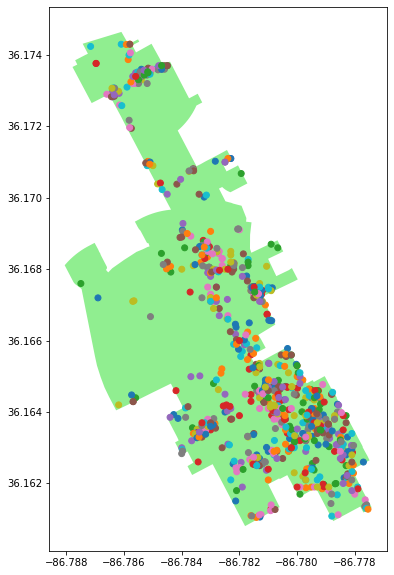

In [100]:
#fig, ax = matplotlib.subplots()
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37219.plot( ax = ax, column = 'sumdID');
plt.show();

In [78]:
stops_in_37208 = stops_by_zip.loc[stops_by_zip['zip'] == '37208']
stops_in_37208 = stops_in_37208[:800]
stops_in_37208.shape

(800, 14)

In [79]:
polygon37208 = zipcodes.loc[zipcodes['zip'] == '37208']
polygon37208.shape

(1, 3)

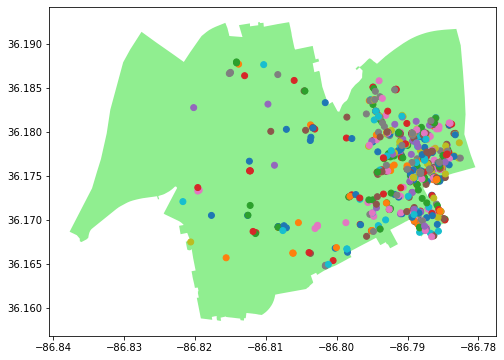

In [101]:
#fig, ax = matplotlib.subplots()
ax = polygon37208.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37208.plot( ax = ax, column = 'sumdID');
plt.show();

In [86]:
stops_in_37209 = stops_by_zip.loc[stops_by_zip['zip'] == '37209']
stops_in_37209.shape

(702, 14)

In [87]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

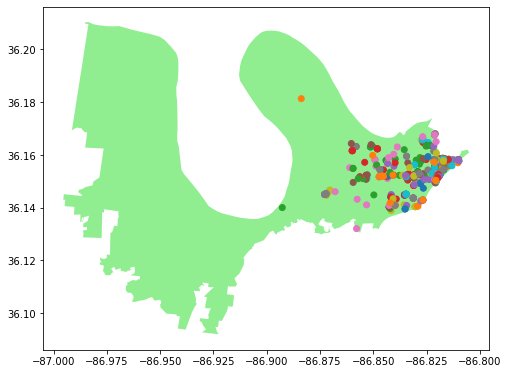

In [102]:
#fig, ax = matplotlib.subplots()
ax = polygon37209.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37209.plot( ax = ax, column = 'sumdID');
plt.show();

In [108]:
stops_in_37240 = stops_by_zip.loc[stops_by_zip['zip'] == '37240']
stops_in_37240 = stops_in_37240[:800]
stops_in_37240.shape

(800, 14)

In [109]:
polygon37240 = zipcodes.loc[zipcodes['zip'] == '37240']
polygon37240.shape

(1, 3)

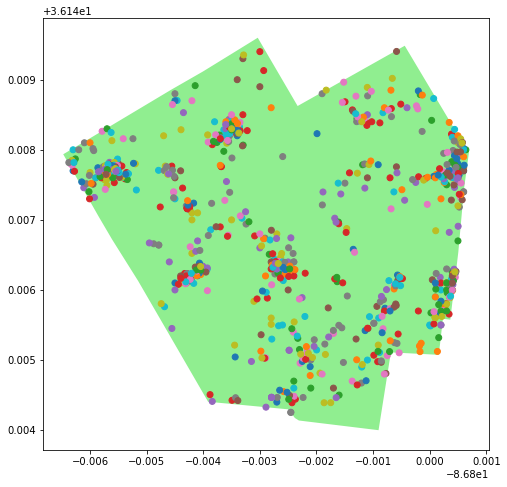

In [110]:
#fig, ax = matplotlib.subplots()
ax = polygon37240.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37240.plot( ax = ax, column = 'sumdID');
plt.show();

In [130]:
stops_in_37212 = stops_by_zip.loc[stops_by_zip['zip'] == '37212']
stops_in_37212 = stops_in_37212[:800]
stops_in_37212.shape

(800, 14)

In [131]:
polygon37212 = zipcodes.loc[zipcodes['zip'] == '37212']
polygon37212.shape

(1, 3)

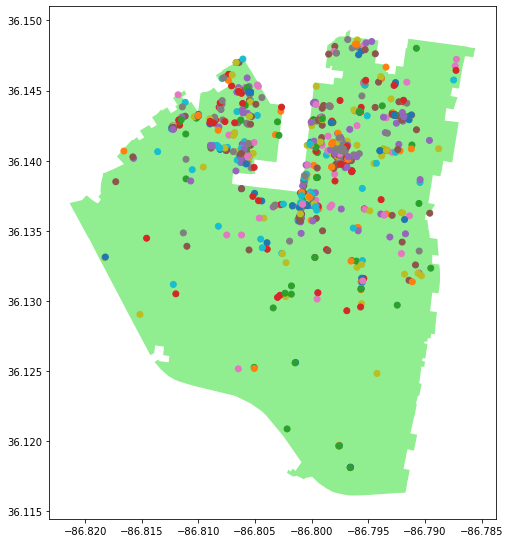

In [132]:
#fig, ax = matplotlib.subplots()
ax = polygon37212.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37212.plot( ax = ax, column = 'sumdID');
plt.show();

In [134]:
stops_in_37210 = stops_by_zip.loc[stops_by_zip['zip'] == '37210']
stops_in_37210 = stops_in_37210[:800]
stops_in_37210.shape

(800, 14)

In [135]:
polygon37210 = zipcodes.loc[zipcodes['zip'] == '37210']
polygon37210.shape

(1, 3)

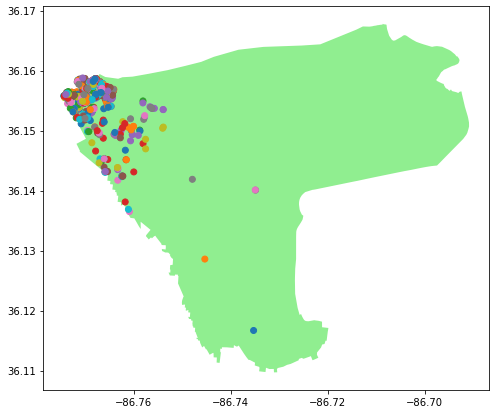

In [136]:
#fig, ax = matplotlib.subplots()
ax = polygon37210.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37210.plot( ax = ax, column = 'sumdID');
plt.show();

In [140]:
stops_in_37201 = stops_by_zip.loc[stops_by_zip['zip'] == '37201']
stops_in_37201 = stops_in_37201[:800]
stops_in_37201.shape

(800, 14)

In [141]:
polygon37201 = zipcodes.loc[zipcodes['zip'] == '37201']
polygon37201.shape

(1, 3)

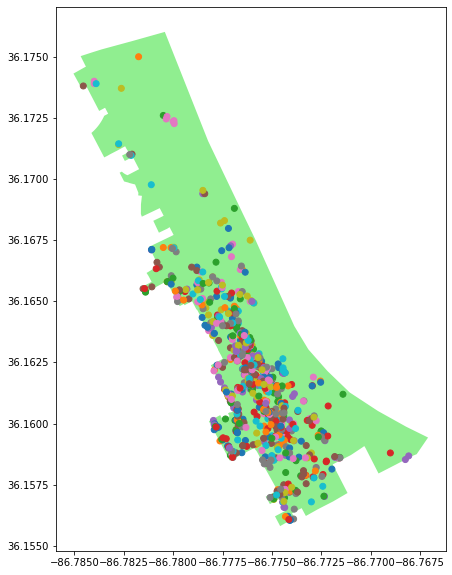

In [142]:
#fig, ax = matplotlib.subplots()
ax = polygon37201.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37201.plot( ax = ax, column = 'sumdID');
plt.show();

In [145]:
stops_in_37228 = stops_by_zip.loc[stops_by_zip['zip'] == '37228']
stops_in_37228.shape

(243, 14)

In [146]:
polygon37228 = zipcodes.loc[zipcodes['zip'] == '37228']
polygon37228.shape

(1, 3)

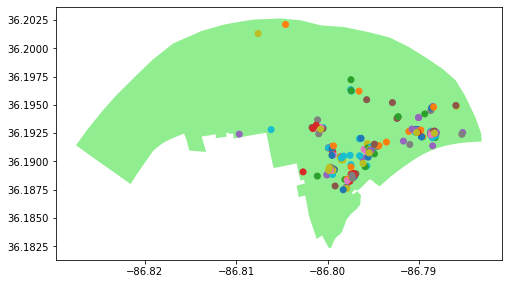

In [147]:
#fig, ax = matplotlib.subplots()
ax = polygon37228.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37228.plot( ax = ax, column = 'sumdID');
plt.show();

In [154]:
stops_in_37232 = stops_by_zip.loc[stops_by_zip['zip'] == '37232']
stops_in_37232 = stops_in_37232[:800]
stops_in_37232.shape

(800, 14)

In [155]:
polygon37232 = zipcodes.loc[zipcodes['zip'] == '37232']
polygon37232.shape

(1, 3)

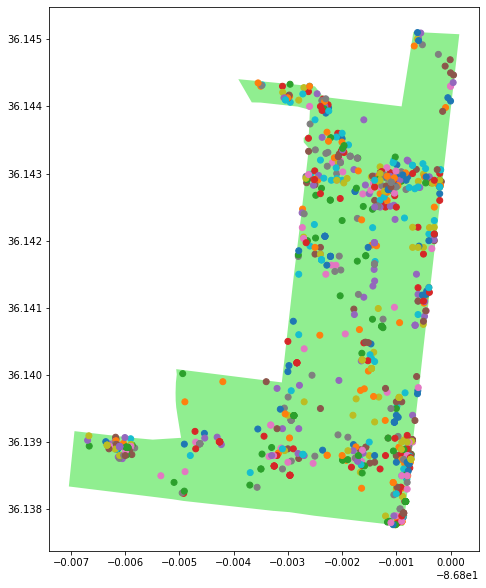

In [156]:
#fig, ax = matplotlib.subplots()
ax = polygon37232.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37232.plot( ax = ax, column = 'sumdID');
plt.show();

In [41]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [42]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 395
values are:
 
pubTimeStamp                             2019-05-01 02:26:02.163000
tripRecordNum                                               BRD2762
tripRoute         [[36.180972,-86.766496],[36.180923,-86.765498]...
sumdID                                                 Powered9C1LL
tripDuration                                                   33.0
tripDistance                                               14763.78
startLatitude                                               36.1809
endLatitude                                                 36.1918
startLongitude                                             -86.7668
endLongitude                                                -86.765
geometry                                   POINT (-86.7668 36.1809)
index_right                                                      49
zip                                                           37207
po_name                                                   NASHVILLE
Name: 395, dtype: obj

In [29]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
#map_37215.save('../maps/map37215.html')

#display our map
map_37207

In [30]:
folium.Map?

In [31]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicyle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
#cluster_map_37215.save('../maps/cluster37215.html')

cluster_map_37207  

In [32]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['startLatitude', 'startLongitude']].values.tolist()
map_37207.add_child(FastMarkerCluster(locations))



#display our map
map_37207

In [81]:
stops_in_37203 = stops_by_zip.loc[stops_by_zip['zip'] == '37203']
stops_in_37203 = stops_in_37203[:800]
stops_in_37203.shape

(800, 14)

In [82]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

In [35]:
#draw our zip code area: 37203
map_37203 = folium.Map(location =  area_center, zoom_start = 12, width=500, height=500, control_scale=True)

folium.GeoJson(polygon37203).add_to(map_37203)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37203[['startLatitude', 'startLongitude']].values.tolist()
map_37203.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37203

In [83]:
stops_in_37215 = stops_by_zip.loc[stops_by_zip['zip'] == '37215']
stops_in_37215.shape

(330, 14)

In [84]:
polygon37215 = zipcodes.loc[zipcodes['zip'] == '37215']
polygon37215.shape

(1, 3)

In [47]:
stops_in_37219 = stops_by_zip.loc[stops_by_zip['zip'] == '37219']
stops_in_37219 = stops_by_zip[:800]
stops_in_37219.shape

(800, 14)

In [48]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

In [159]:
#draw our zip code area: 37215
map_37215 = folium.Map(location =  area_center, zoom_start = 11, control_scale=True)

folium.GeoJson(polygon37215).add_to(map_37215)
folium.GeoJson(polygon37203).add_to(map_37215)
folium.GeoJson(polygon37207).add_to(map_37215)
folium.GeoJson(polygon37206).add_to(map_37215)
folium.GeoJson(polygon37213).add_to(map_37215)
folium.GeoJson(polygon37219).add_to(map_37215)
folium.GeoJson(polygon37208).add_to(map_37215)
folium.GeoJson(polygon37209).add_to(map_37215)
folium.GeoJson(polygon37240).add_to(map_37215)
folium.GeoJson(polygon37212).add_to(map_37215)
folium.GeoJson(polygon37210).add_to(map_37215)
folium.GeoJson(polygon37201).add_to(map_37215)
folium.GeoJson(polygon37228).add_to(map_37215)
folium.GeoJson(polygon37232).add_to(map_37215)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37215[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #GreenHills

locations = stops_in_37203[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#WestEnd, CentennialPark, Broadway, Demonbreum, Fairgrounds,GulchWest

locations = stops_in_37207[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#DickersonPike, ClevelandPark

locations = stops_in_37206[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#EastNashville

locations = stops_in_37213[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#TitansStadium

locations = stops_in_37219[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#StateCapitol

locations = stops_in_37208[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#NorthNashville, Temple Cementary

locations = stops_in_37209[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#TSU, JohnTuneAirport

locations = stops_in_37240[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Vanderbilt Campus

locations = stops_in_37212[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#Belmont

locations = stops_in_37210[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Trevecca, GulchEast

locations = stops_in_37201[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#RiverFront, lowerBroadway, PublicSquare

locations = stops_in_37228[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #MetroCenter, TedRhodesFields

locations = stops_in_37232[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Vanderbilt Hosp

#display our map
map_37215

In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)
folium.GeoJson(polygon37215).add_to(map_37207)
folium.GeoJson(polygon37203).add_to(map_37207)
folium.GeoJson(polygon37206).add_to(map_37207)
folium.GeoJson(polygon37219).add_to(map_37207)
folium.GeoJson(polygon37203).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37215.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37203.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37206.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37213.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37219.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
#map_37215.save('../maps/map37215.html')

#display our map
map_37207